In [12]:
from qiskit_aer import AerSimulator
from qiskit import *
import supermarq
from qiskit.providers.fake_provider import *
import numpy as np 
import os

########## INPUT ############
f=5 # number of fake_backend want to choose
lower_limit= 3 # the lower limit of qubits for the circuit
upper_limit= 20 # the lower limit of qubits for the circuit
steps= 3 #jump in qubit numbers
name_of_algo='ghz'

In [13]:
all_fakes=[FakeAlmadenV2,FakeArmonkV2,FakeAthensV2,FakeAuckland,FakeBelemV2,FakeBoeblingenV2,FakeBogotaV2,FakeBrooklynV2,FakeBurlingtonV2,FakeCairoV2,FakeCambridgeV2,FakeCasablancaV2,FakeEssexV2,FakeGeneva,FakeGuadalupeV2,FakeHanoiV2,FakeJakartaV2,FakeJohannesburgV2,FakeKolkataV2,FakeLagosV2,FakeLimaV2,FakeLondonV2,FakeManhattanV2,FakeManilaV2,FakeMelbourneV2,FakeMontrealV2,FakeMumbaiV2,FakeNairobiV2,FakeOslo,FakeOurenseV2,FakeParisV2,FakePerth,FakePrague,FakePoughkeepsieV2,FakeQuitoV2,FakeRochesterV2,FakeRomeV2,FakeSantiagoV2,FakeSherbrooke,FakeSingaporeV2,FakeSydneyV2,FakeTorontoV2,FakeValenciaV2,FakeVigoV2,FakeWashingtonV2,FakeYorktownV2]
import random; selected_fakes = random.sample(all_fakes, f)
selected_fakes  # having any randomly selected 5 fake backends out of 46 mentioned in the inital list

[qiskit.providers.fake_provider.backends.geneva.fake_geneva.FakeGeneva,
 qiskit.providers.fake_provider.backends.ourense.fake_ourense.FakeOurenseV2,
 qiskit.providers.fake_provider.backends.boeblingen.fake_boeblingen.FakeBoeblingenV2,
 qiskit.providers.fake_provider.backends.singapore.fake_singapore.FakeSingaporeV2,
 qiskit.providers.fake_provider.backends.jakarta.fake_jakarta.FakeJakartaV2]

In [14]:
benchmarks=[]
for i in range(lower_limit,upper_limit,steps):
    label = name_of_algo+str(i)
    benchmarks.append((supermarq.ghz.GHZ(i),label))
for i in benchmarks:
    circuit=i[0].qiskit_circuit()
    print("--------------------------",i[1],"---------------------------")
    #circuit.draw(output="mpl")
    print(circuit.draw())

-------------------------- ghz3 ---------------------------
     ┌───┐          ┌─┐      
q_0: ┤ H ├──■───────┤M├──────
     └───┘┌─┴─┐     └╥┘┌─┐   
q_1: ─────┤ X ├──■───╫─┤M├───
          └───┘┌─┴─┐ ║ └╥┘┌─┐
q_2: ──────────┤ X ├─╫──╫─┤M├
               └───┘ ║  ║ └╥┘
c: 3/════════════════╩══╩══╩═
                     0  1  2 
-------------------------- ghz6 ---------------------------
     ┌───┐          ┌─┐                              
q_0: ┤ H ├──■───────┤M├──────────────────────────────
     └───┘┌─┴─┐     └╥┘     ┌─┐                      
q_1: ─────┤ X ├──■───╫──────┤M├──────────────────────
          └───┘┌─┴─┐ ║      └╥┘     ┌─┐              
q_2: ──────────┤ X ├─╫───■───╫──────┤M├──────────────
               └───┘ ║ ┌─┴─┐ ║      └╥┘     ┌─┐      
q_3: ────────────────╫─┤ X ├─╫───■───╫──────┤M├──────
                     ║ └───┘ ║ ┌─┴─┐ ║      └╥┘┌─┐   
q_4: ────────────────╫───────╫─┤ X ├─╫───■───╫─┤M├───
                     ║       ║ └───┘ ║ ┌─┴─┐ ║ └╥┘┌─┐
q_5: ───────────

In [15]:
benchmark_features = {}
for benchmark, label in benchmarks:
    benchmark_features[label] = [
        supermarq.converters.compute_communication_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_depth_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_entanglement_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_liveness_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_measurement_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_parallelism_with_qiskit(benchmark.qiskit_circuit()),]
print(benchmark_features)

{'ghz3': [0.6666666666666666, 1.0, 0.6666666666666666, 0.6666666666666666, 0.0, 0], 'ghz6': [0.3333333333333333, 1.0, 0.8333333333333334, 0.40476190476190477, 0.0, 0], 'ghz9': [0.2222222222222222, 1.0, 0.8888888888888888, 0.28888888888888886, 0.0, 0], 'ghz12': [0.16666666666666666, 1.0, 0.9166666666666666, 0.22435897435897437, 0.0, 0], 'ghz15': [0.13333333333333333, 1.0, 0.9333333333333333, 0.18333333333333332, 0.0, 0], 'ghz18': [0.1111111111111111, 1.0, 0.9444444444444444, 0.15497076023391812, 0.0, 0]}


In [16]:
%time
import time
import pandas as pd
from IPython.display import display
jobs =[]
data=[]
print("=============SCORES OF ALL THE CIRCUITS=============")    
for backend in selected_fakes:
    print("BACKEND-NAME :: ", backend().name)
    for benchmark, label in benchmarks:
        circuit=benchmark.qiskit_circuit()
        score_list=[]
        timetaken=[]
        for i in range(0,5):
            start=time.time()
            job = backend().run(circuit, shots=1000)
            end=time.time()-start
            result = job.result()
            counts = job.result(0).get_counts()
            score = benchmark.score(counts)
            score_list.append(score)
            t=job.result(0).time_taken
            timetaken.append(t)
            #print(i+1,"th iteration Execution time::",t)
            print(label ," ExecutionTime:",t,"")
        print("------------------------------------------")
        score = np.mean(score_list) 
        sd = np.std(score_list)
        execution_time = np.mean(timetaken)
        dictionary={}
        dictionary["Backend_Time"]=backend().name
        dictionary["ciruit_Name"]=label    
        dictionary["Execution_Time"]=execution_time
        dictionary["Total_Time"]=end
        data.append(dictionary)
        jobs.append((label,benchmark,backend,job,score,sd,execution_time,end))
#jobs
df = pd.DataFrame(data)
display(df)
df.to_excel(r"./output_ghz.xlsx", index=False)

CPU times: user 8 µs, sys: 0 ns, total: 8 µs
Wall time: 17.6 µs
=============SCORES OF ALL THE CIRCUITS=============
BACKEND-NAME ::  fake_geneva
ghz3  ExecutionTime: 0.7415823936462402 
ghz3  ExecutionTime: 0.8422551155090332 
ghz3  ExecutionTime: 0.4759712219238281 
ghz3  ExecutionTime: 0.8033838272094727 
ghz3  ExecutionTime: 0.5118973255157471 
------------------------------------------
ghz6  ExecutionTime: 0.4905049800872803 
ghz6  ExecutionTime: 0.5050654411315918 
ghz6  ExecutionTime: 0.804570198059082 
ghz6  ExecutionTime: 0.44896483421325684 
ghz6  ExecutionTime: 0.774559736251831 
------------------------------------------
ghz9  ExecutionTime: 0.8891210556030273 
ghz9  ExecutionTime: 1.389829397201538 
ghz9  ExecutionTime: 1.0983846187591553 
ghz9  ExecutionTime: 1.0635547637939453 
ghz9  ExecutionTime: 1.6195814609527588 
------------------------------------------
ghz12  ExecutionTime: 0.8090577125549316 
ghz12  ExecutionTime: 0.7727494239807129 
ghz12  ExecutionTime: 1.4144

,Backend_Time,ciruit_Name,Execution_Time,Total_Time
0,fake_geneva,ghz3,0.675018,1.885898
1,fake_geneva,ghz6,0.604733,1.924592
2,fake_geneva,ghz9,1.212094,1.633345
3,fake_geneva,ghz12,1.133718,1.144669
4,fake_geneva,ghz15,3.106828,1.158300
5,fake_geneva,ghz18,19.017318,1.576233
6,fake_ourense,ghz3,0.213229,0.121933
7,fake_ourense,ghz6,0.069159,0.129873
8,fake_ourense,ghz9,0.618396,0.136176
9,fake_ourense,ghz12,0.379930,0.239085


In [17]:
all_scores={}  
all_fake_names=[]
all_fake_scores=[]
for i in selected_fakes:
    fakes=i
    #print("SELCETED_FAKES:: ",i)
    i={}
    for label,benchmark,backend,job,score,sd,exec,tot in jobs:
        #supermarq.plotting.plot_results([score], [label])
        if fakes == backend:
            i[label] = score
    device_scores = 'device_score_' +str(fakes().name)
    all_scores[device_scores]= i
    all_fake_scores.append(i)
    all_fake_names.append(device_scores)   
#print(all_scores)    

USED BACKEND:: fake_geneva ; CIRCUIT_NAME: ghz3 ; SCORE = 0.9060423166252807


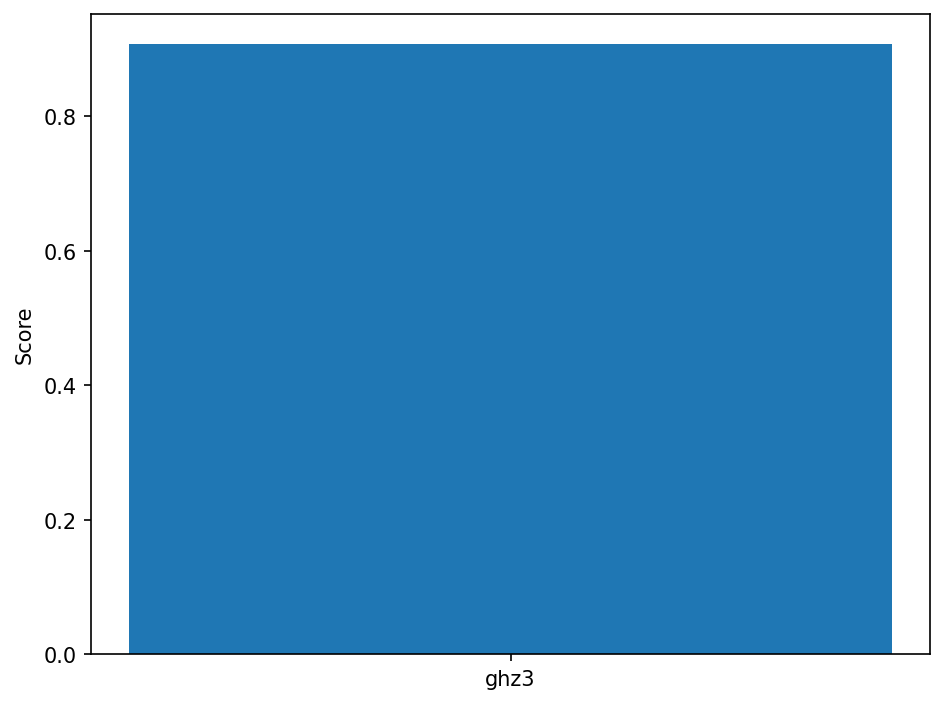

-----------------------------------------------------------
USED BACKEND:: fake_geneva ; CIRCUIT_NAME: ghz6 ; SCORE = 0.8202619610140826


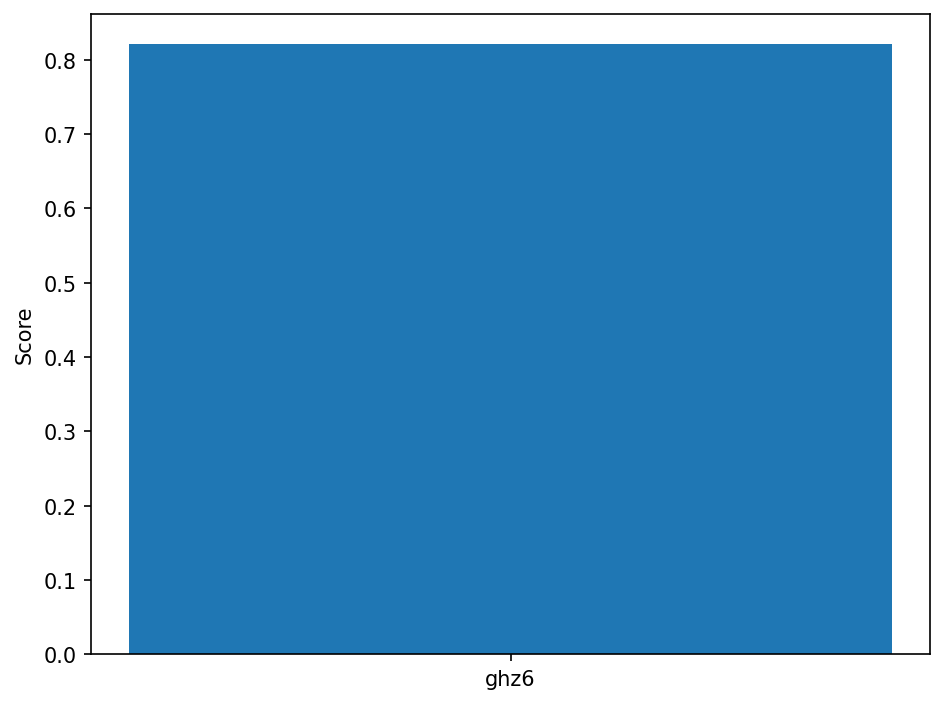

-----------------------------------------------------------
USED BACKEND:: fake_geneva ; CIRCUIT_NAME: ghz9 ; SCORE = 0.7427992249337463


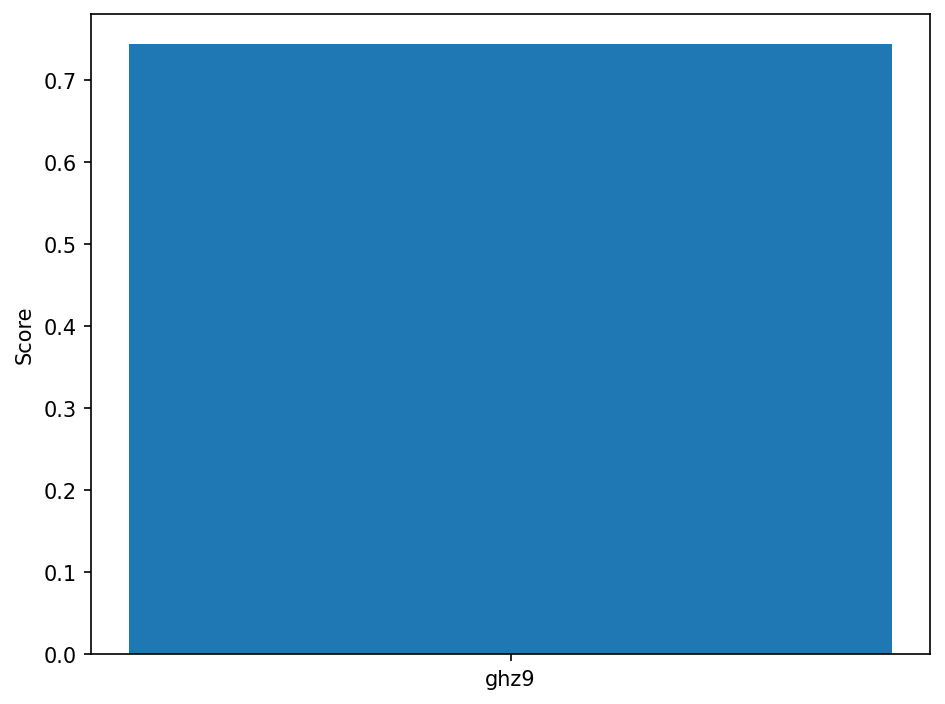

-----------------------------------------------------------
USED BACKEND:: fake_geneva ; CIRCUIT_NAME: ghz12 ; SCORE = 0.694352571661706


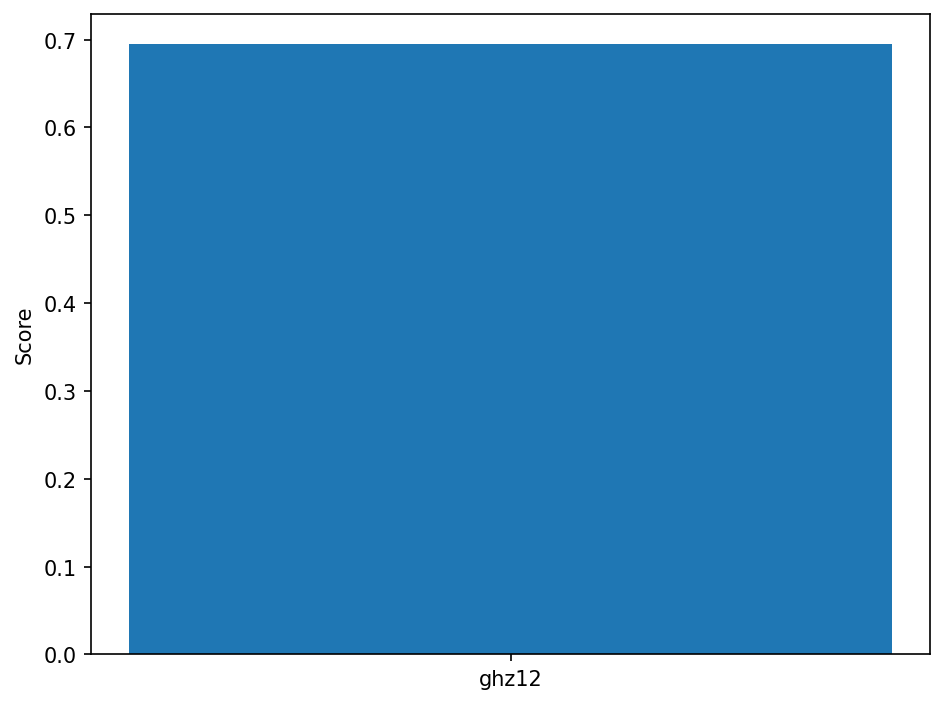

-----------------------------------------------------------
USED BACKEND:: fake_geneva ; CIRCUIT_NAME: ghz15 ; SCORE = 0.5700022018673998


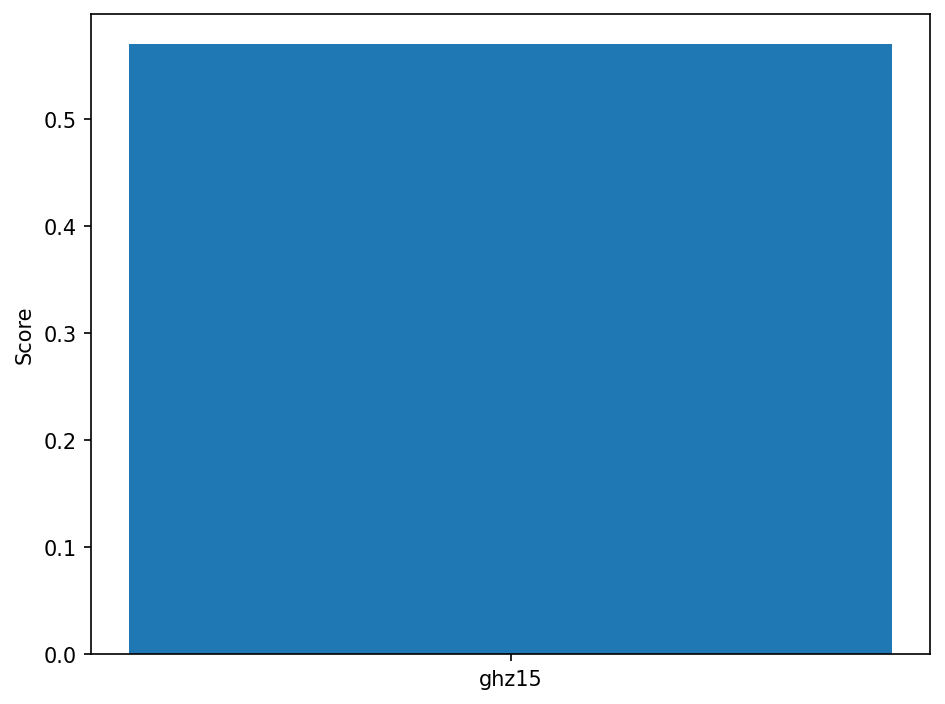

-----------------------------------------------------------
USED BACKEND:: fake_geneva ; CIRCUIT_NAME: ghz18 ; SCORE = 0.4051270322825373


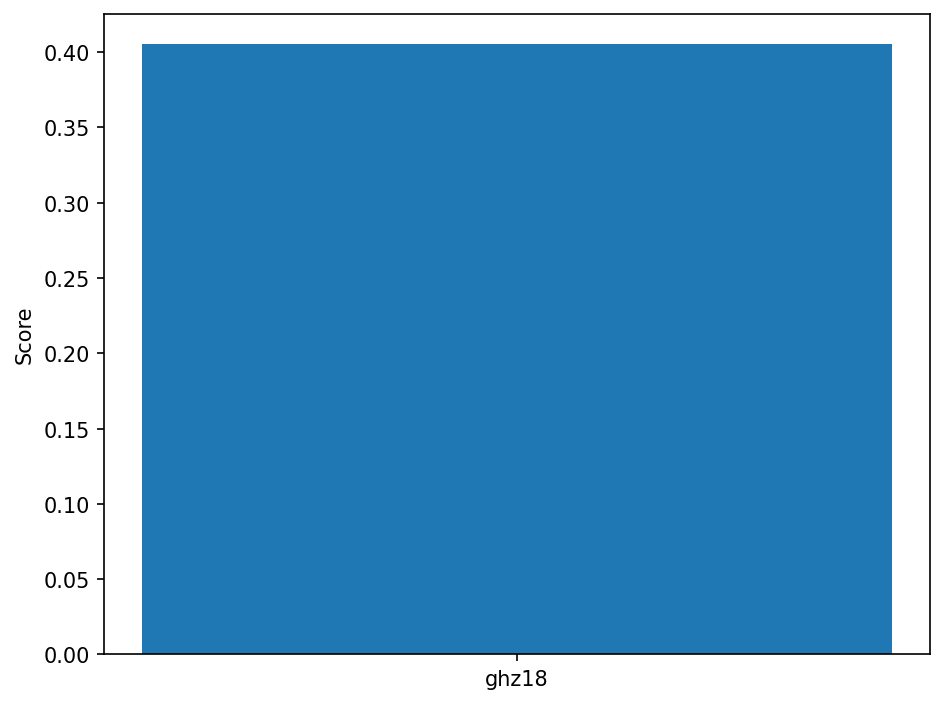

-----------------------------------------------------------
USED BACKEND:: fake_ourense ; CIRCUIT_NAME: ghz3 ; SCORE = 0.9258134886815543


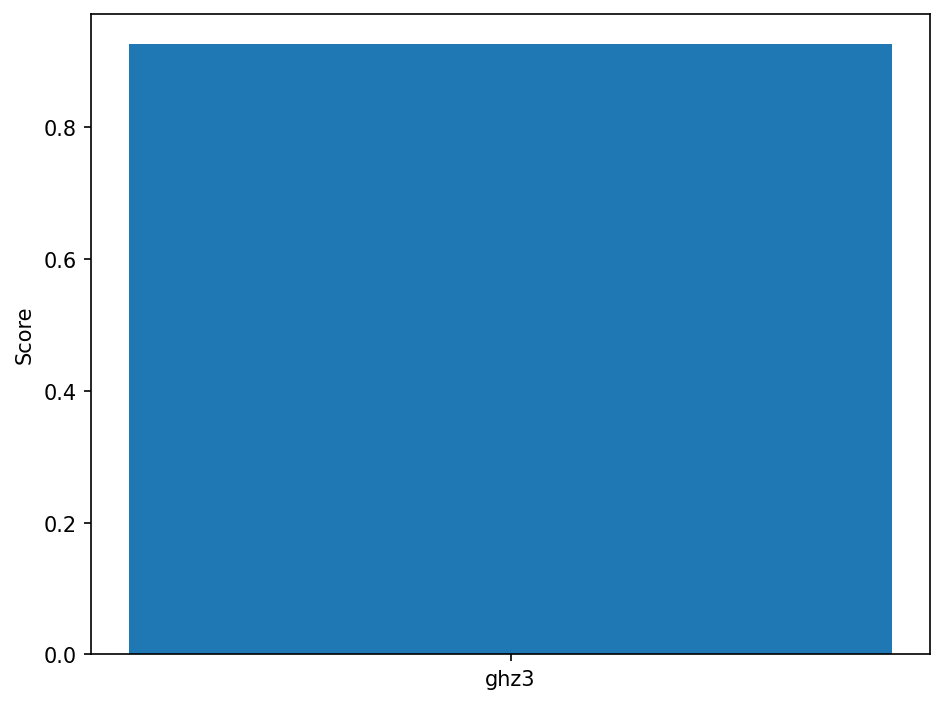

-----------------------------------------------------------
USED BACKEND:: fake_ourense ; CIRCUIT_NAME: ghz6 ; SCORE = 0.854442760876321


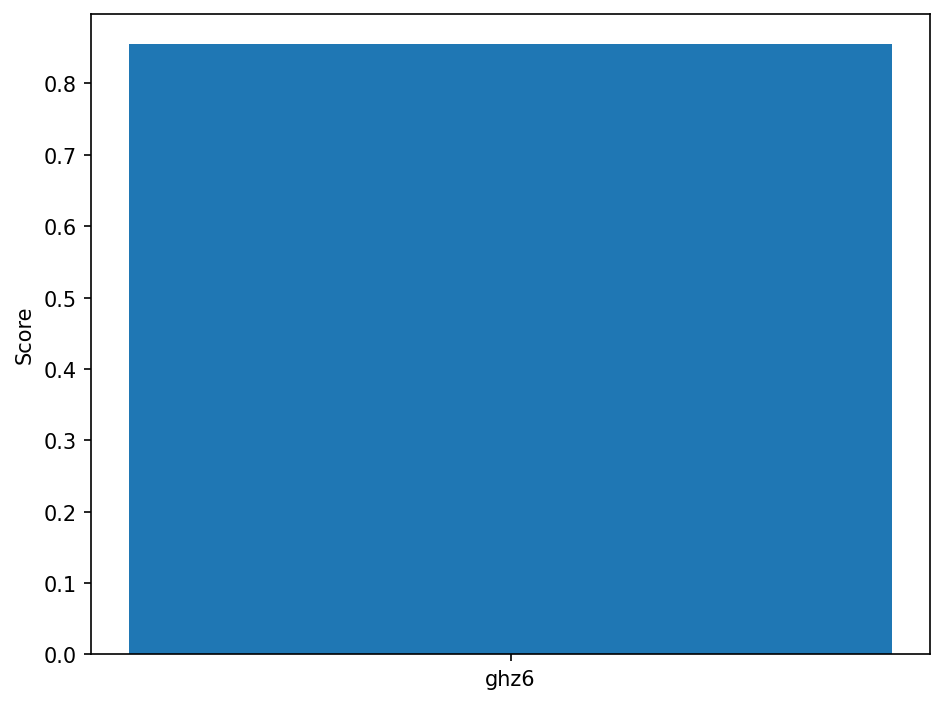

-----------------------------------------------------------
USED BACKEND:: fake_ourense ; CIRCUIT_NAME: ghz9 ; SCORE = 0.8463498090700023


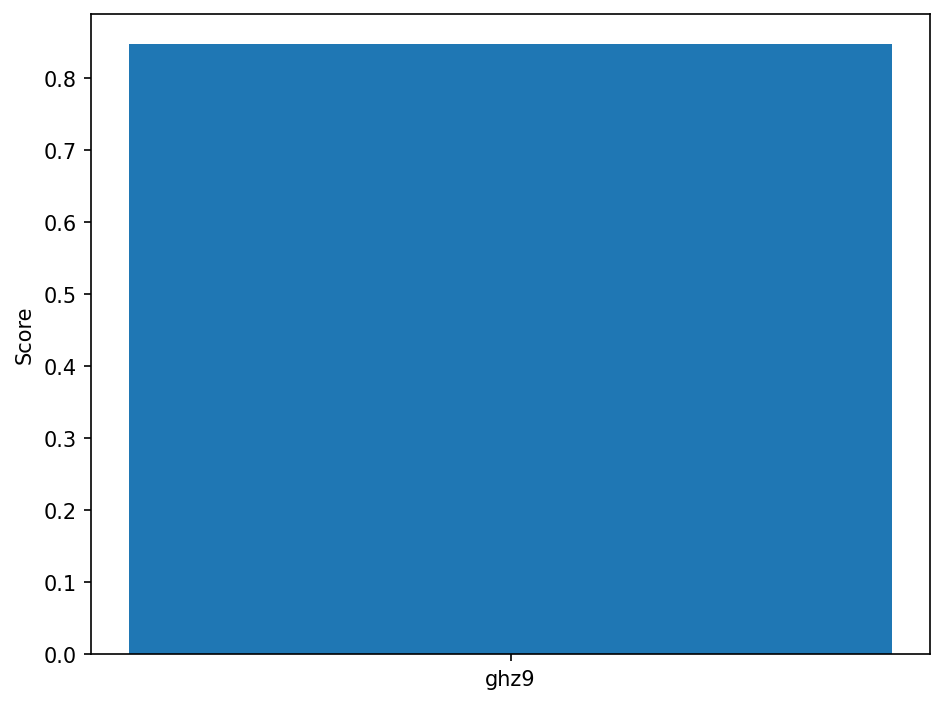

-----------------------------------------------------------
USED BACKEND:: fake_ourense ; CIRCUIT_NAME: ghz12 ; SCORE = 0.8467720310464892


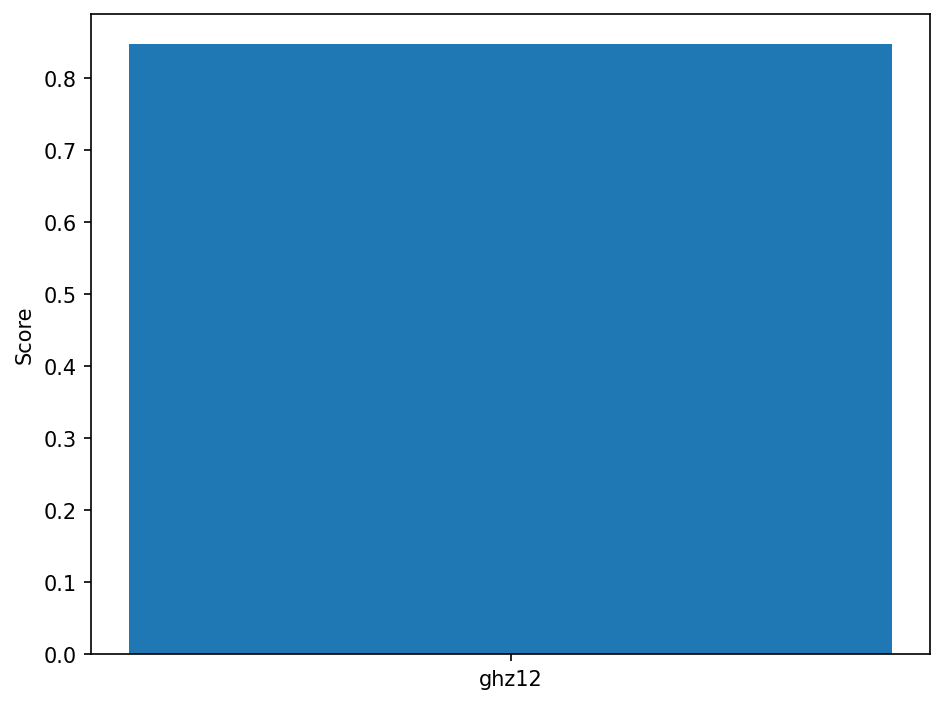

-----------------------------------------------------------
USED BACKEND:: fake_ourense ; CIRCUIT_NAME: ghz15 ; SCORE = 0.8390296260494609


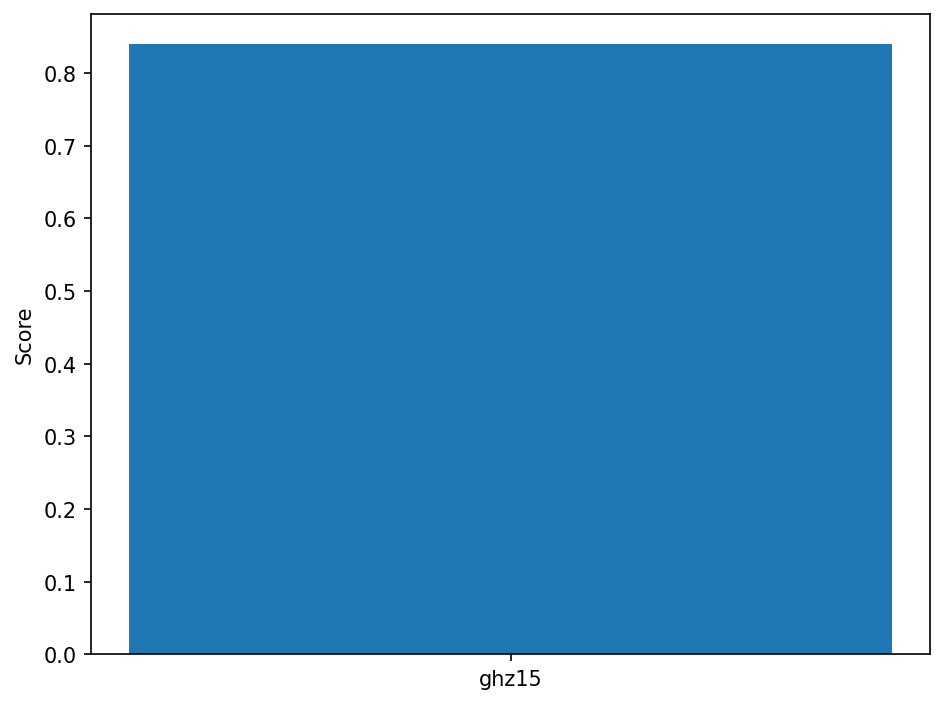

-----------------------------------------------------------
USED BACKEND:: fake_ourense ; CIRCUIT_NAME: ghz18 ; SCORE = 0.8624383723261545


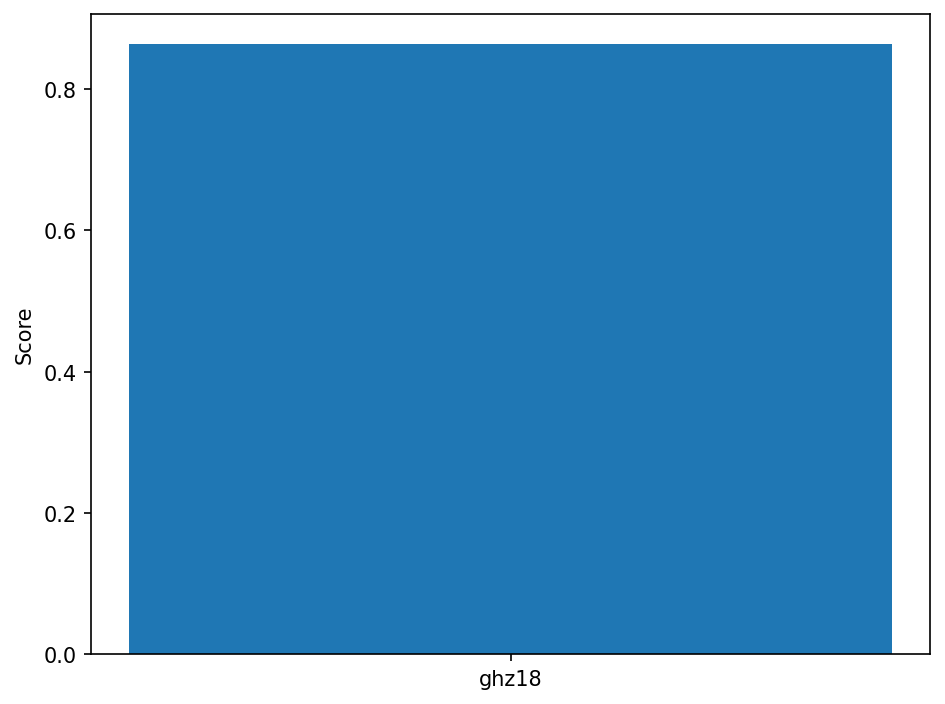

-----------------------------------------------------------
USED BACKEND:: fake_boeblingen ; CIRCUIT_NAME: ghz3 ; SCORE = 0.8673672969230228


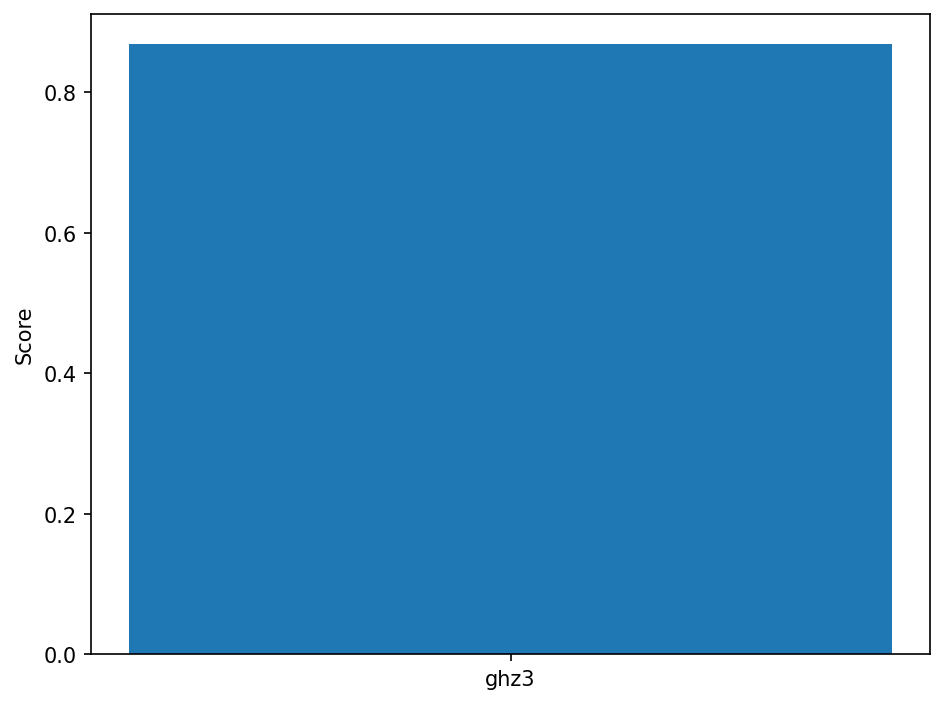

-----------------------------------------------------------
USED BACKEND:: fake_boeblingen ; CIRCUIT_NAME: ghz6 ; SCORE = 0.7733948028425732


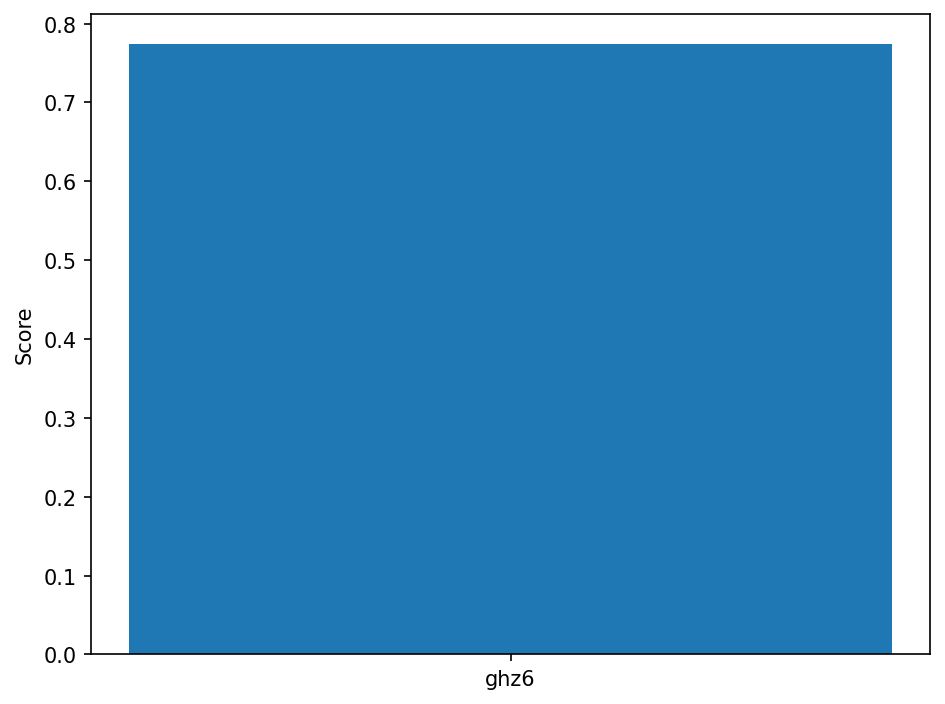

-----------------------------------------------------------
USED BACKEND:: fake_boeblingen ; CIRCUIT_NAME: ghz9 ; SCORE = 0.644406265683329


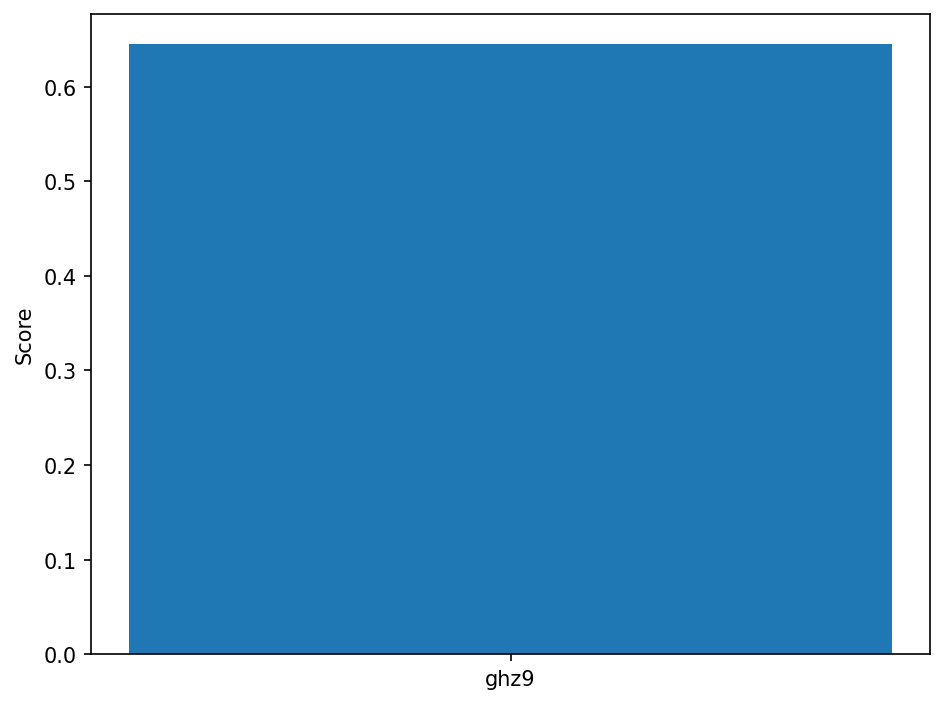

-----------------------------------------------------------
USED BACKEND:: fake_boeblingen ; CIRCUIT_NAME: ghz12 ; SCORE = 0.5084421711695837


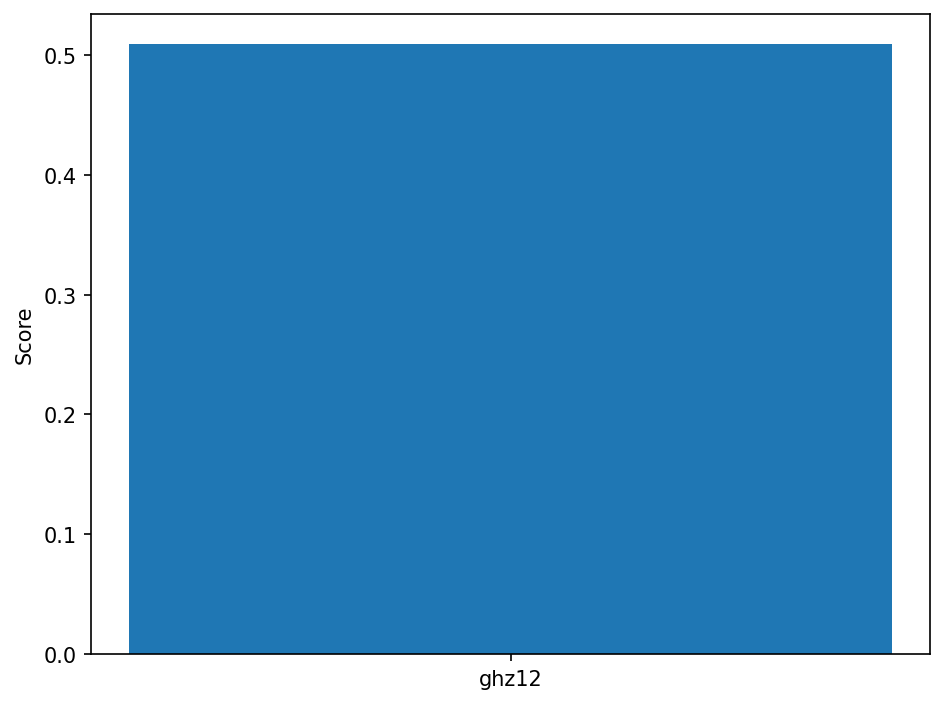

-----------------------------------------------------------
USED BACKEND:: fake_boeblingen ; CIRCUIT_NAME: ghz15 ; SCORE = 0.41839605419084575


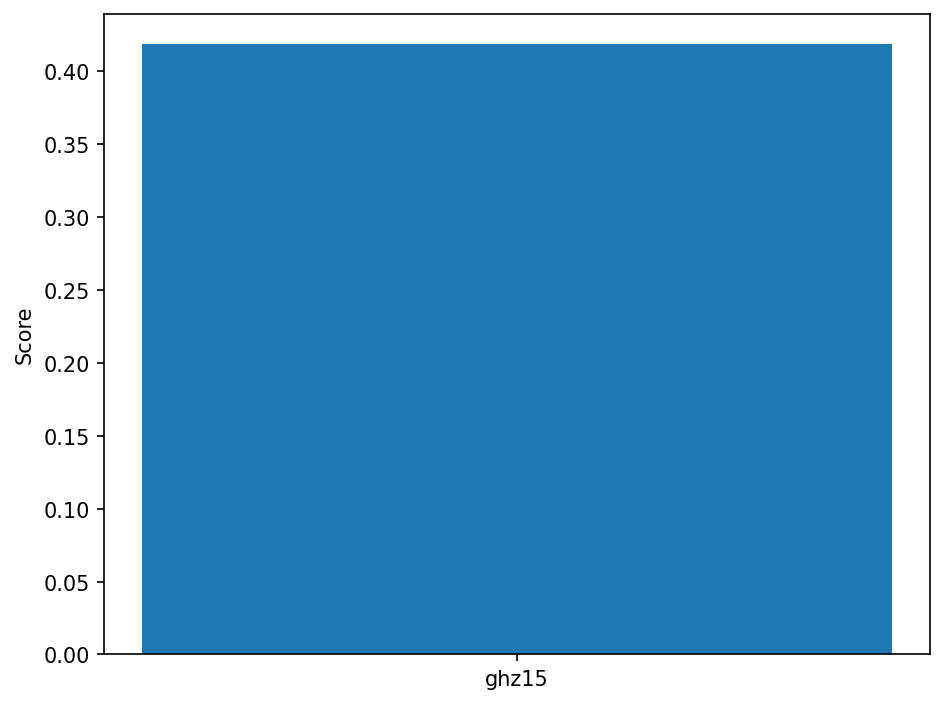

-----------------------------------------------------------
USED BACKEND:: fake_boeblingen ; CIRCUIT_NAME: ghz18 ; SCORE = 0.37903311871465006


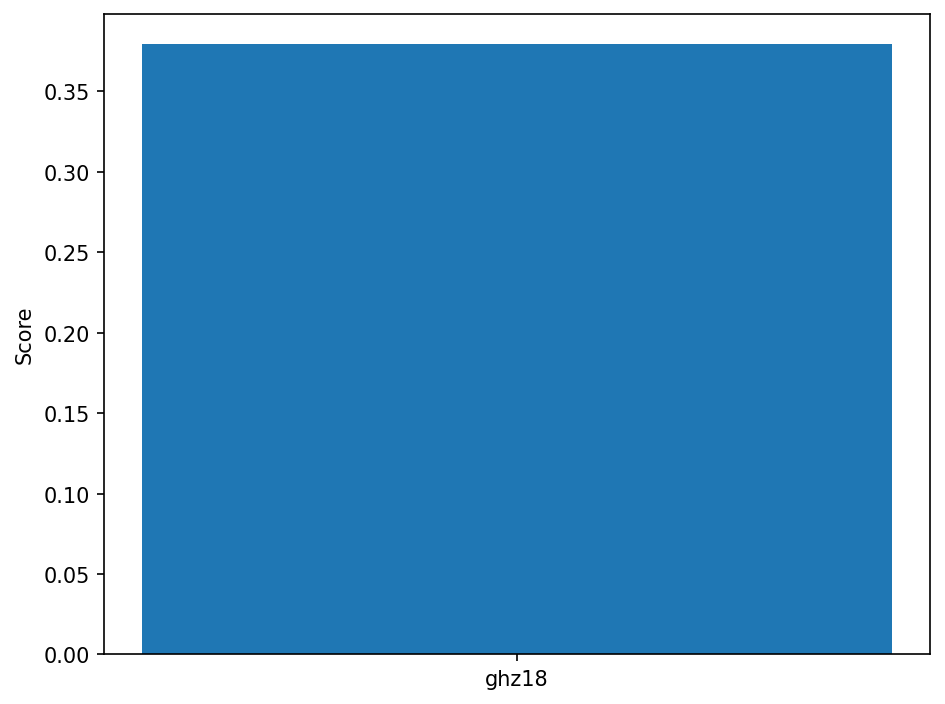

-----------------------------------------------------------
USED BACKEND:: fake_singapore ; CIRCUIT_NAME: ghz3 ; SCORE = 0.8550987924445381


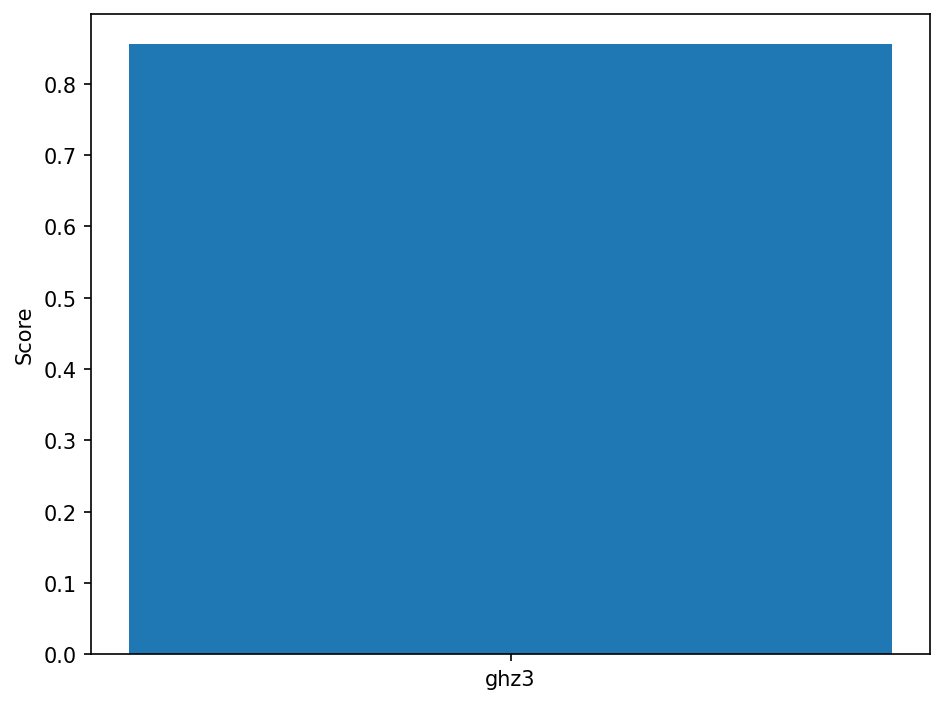

-----------------------------------------------------------
USED BACKEND:: fake_singapore ; CIRCUIT_NAME: ghz6 ; SCORE = 0.7230645597541746


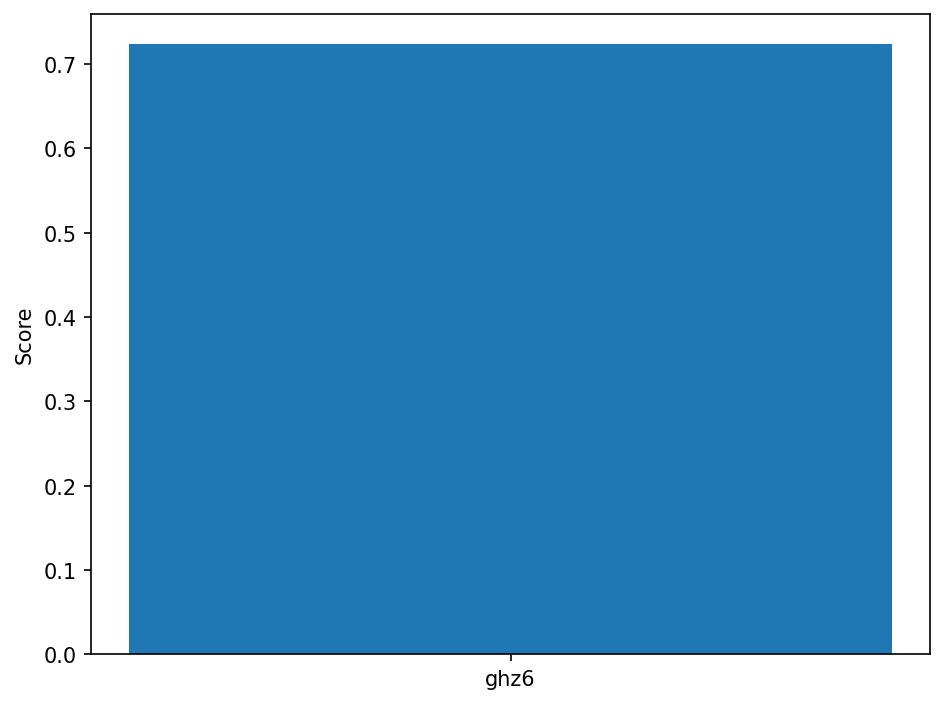

-----------------------------------------------------------
USED BACKEND:: fake_singapore ; CIRCUIT_NAME: ghz9 ; SCORE = 0.617376207306437


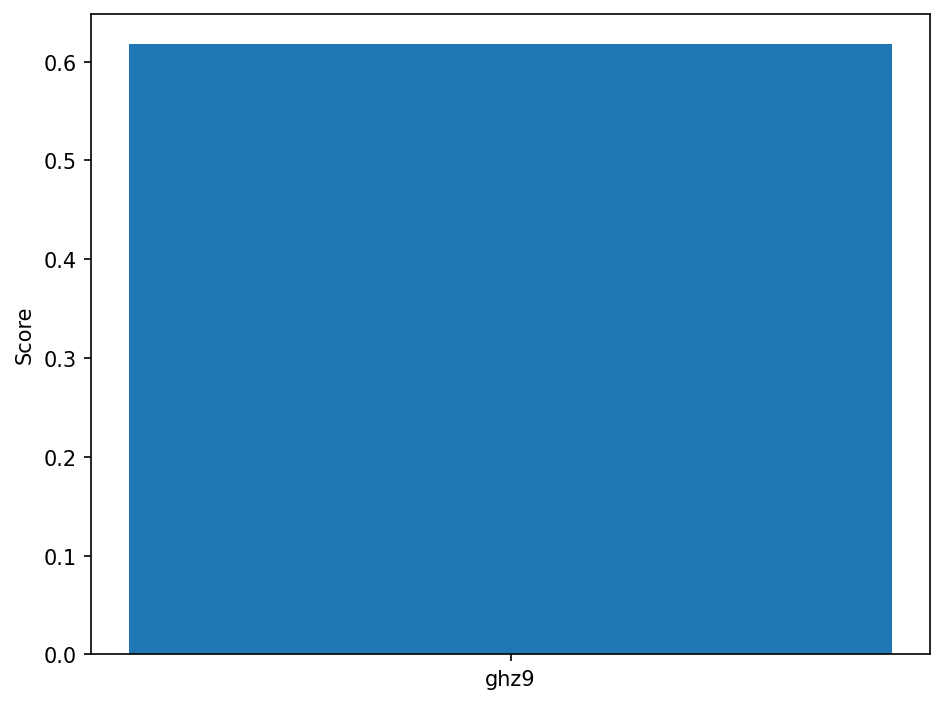

-----------------------------------------------------------
USED BACKEND:: fake_singapore ; CIRCUIT_NAME: ghz12 ; SCORE = 0.5178690168418353


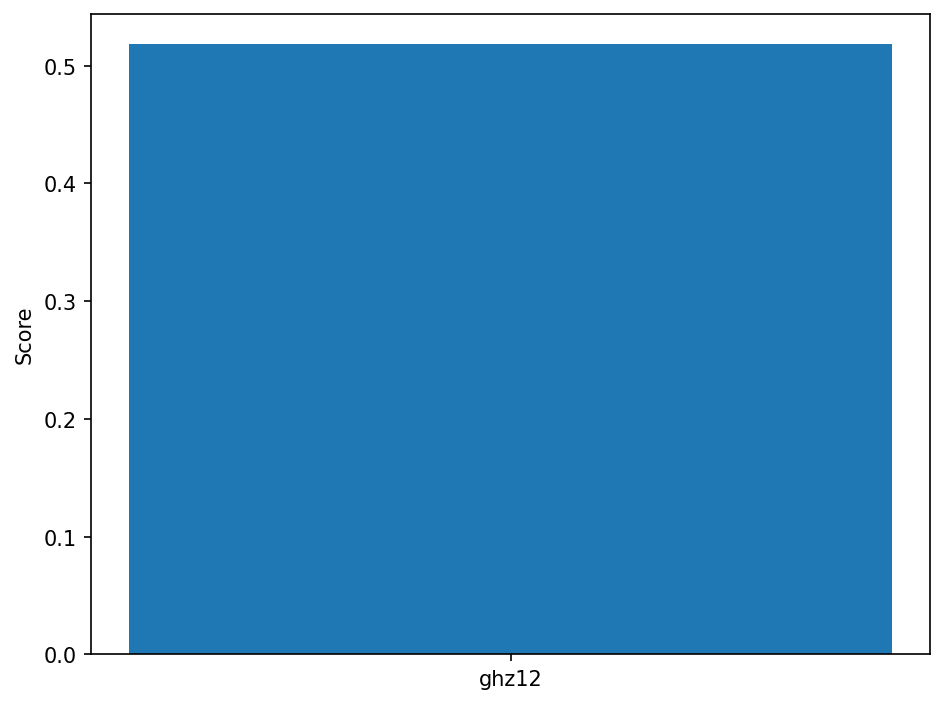

-----------------------------------------------------------
USED BACKEND:: fake_singapore ; CIRCUIT_NAME: ghz15 ; SCORE = 0.43733151933199227


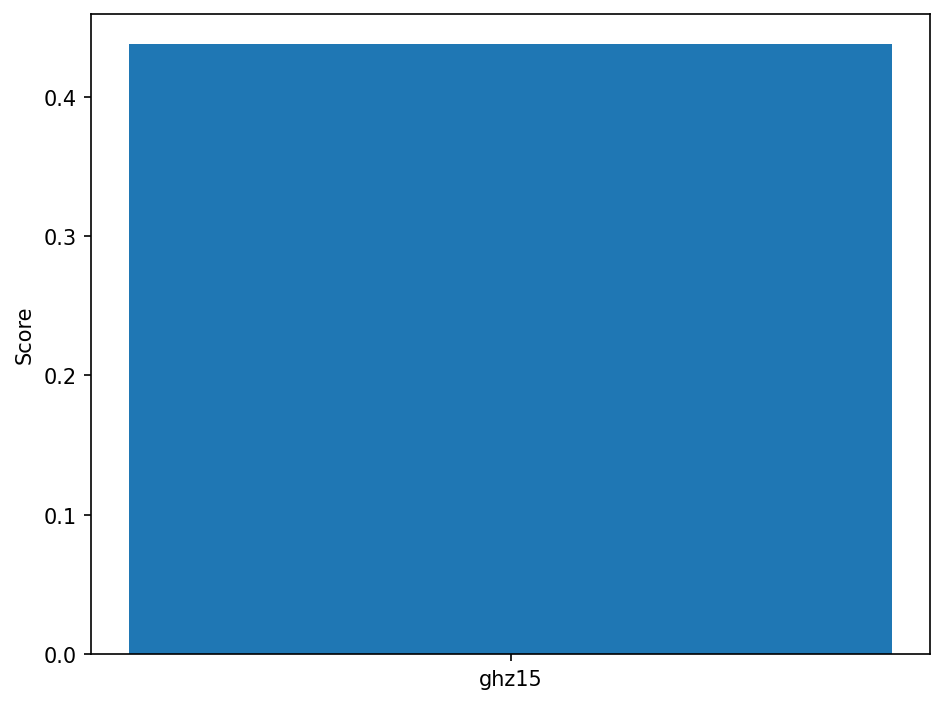

-----------------------------------------------------------
USED BACKEND:: fake_singapore ; CIRCUIT_NAME: ghz18 ; SCORE = 0.3483669779376356


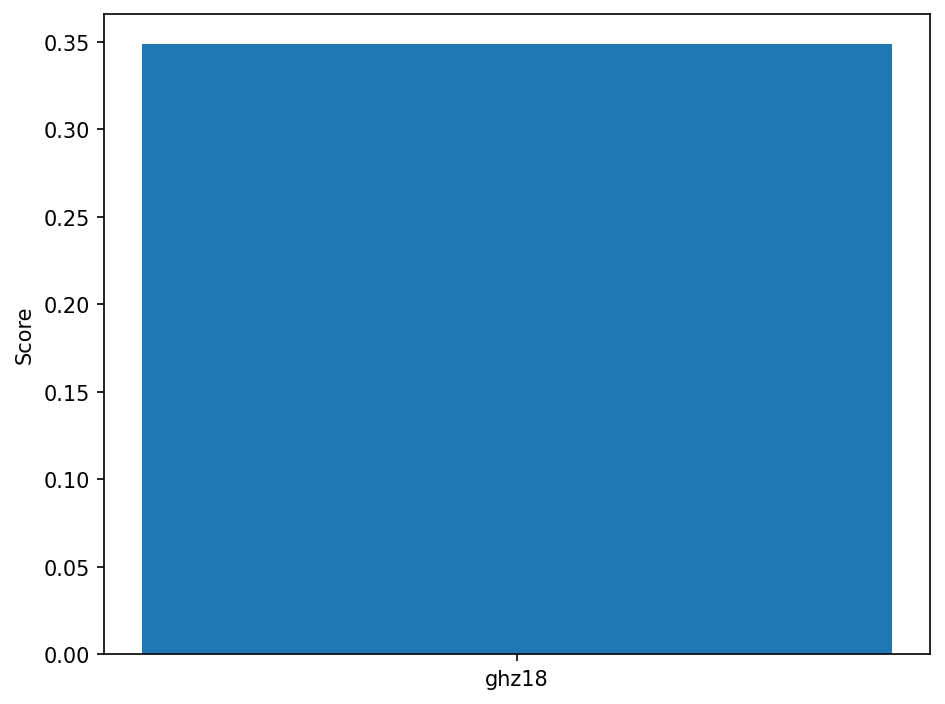

-----------------------------------------------------------
USED BACKEND:: fake_jakarta ; CIRCUIT_NAME: ghz3 ; SCORE = 0.9139648262973579


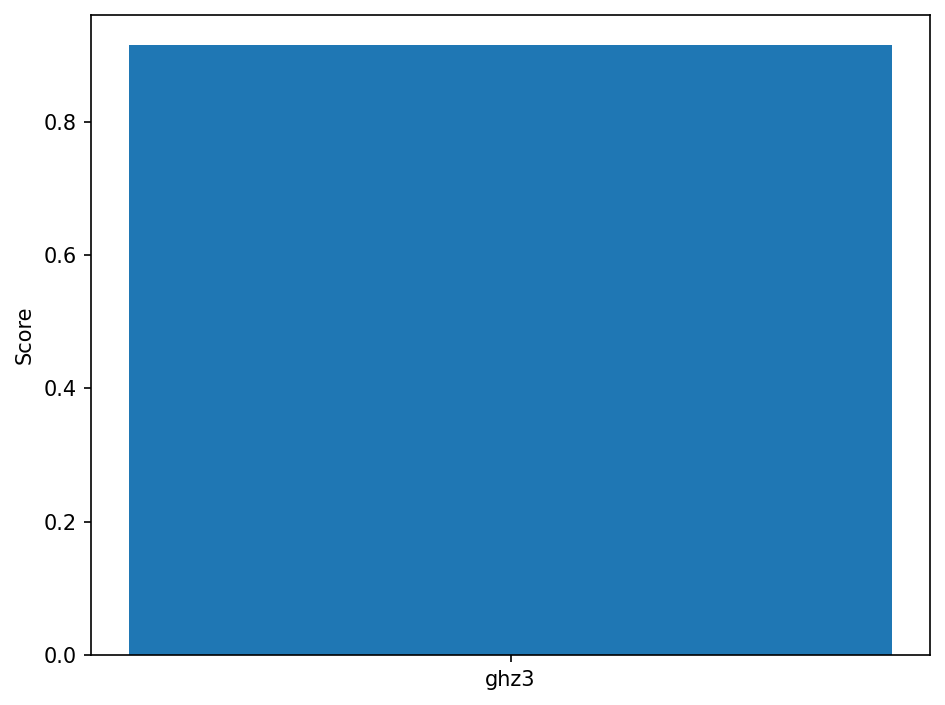

-----------------------------------------------------------
USED BACKEND:: fake_jakarta ; CIRCUIT_NAME: ghz6 ; SCORE = 0.8441587687256977


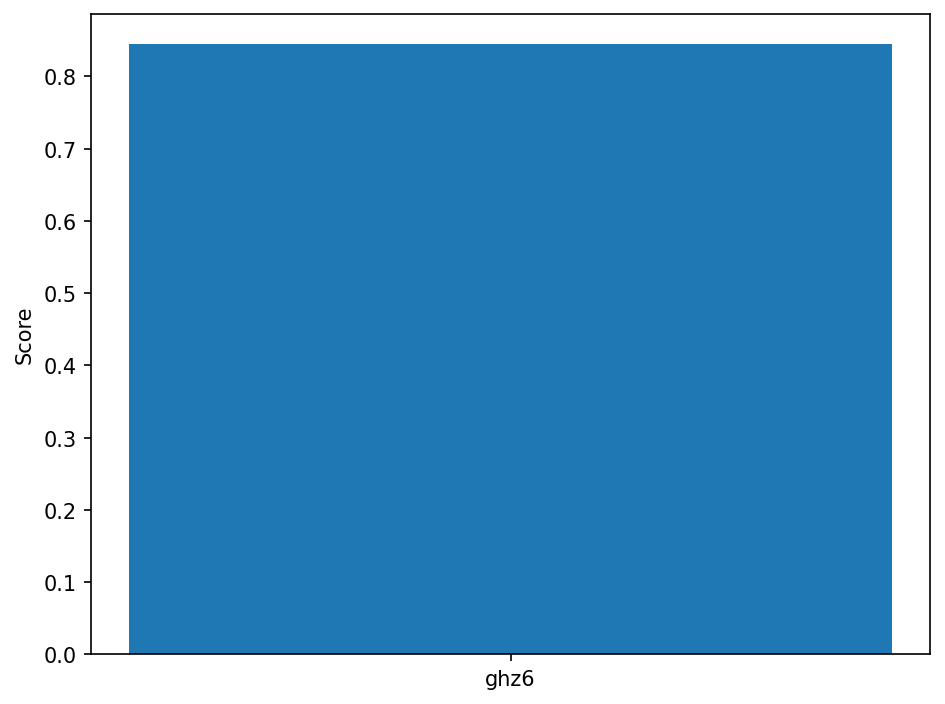

-----------------------------------------------------------
USED BACKEND:: fake_jakarta ; CIRCUIT_NAME: ghz9 ; SCORE = 0.8322453243751111


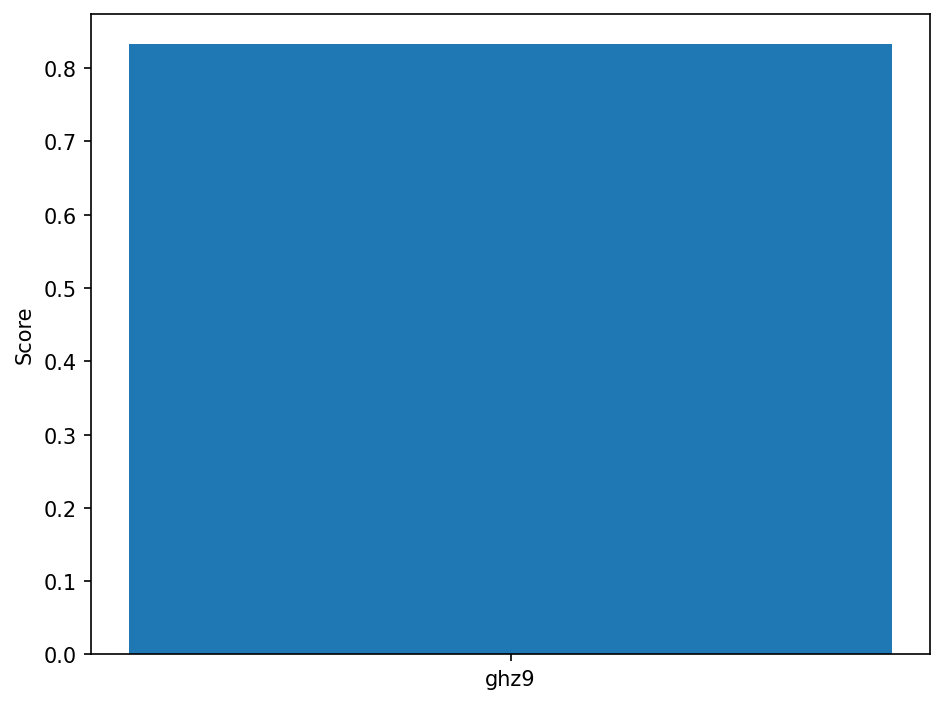

-----------------------------------------------------------
USED BACKEND:: fake_jakarta ; CIRCUIT_NAME: ghz12 ; SCORE = 0.8170125944942784


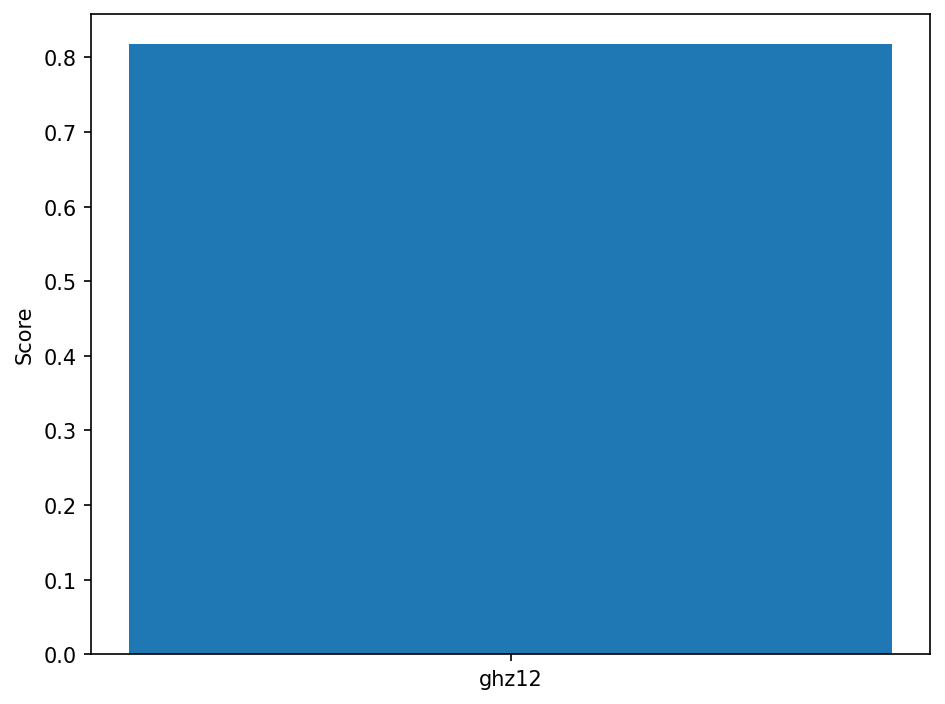

-----------------------------------------------------------
USED BACKEND:: fake_jakarta ; CIRCUIT_NAME: ghz15 ; SCORE = 0.8372021474064513


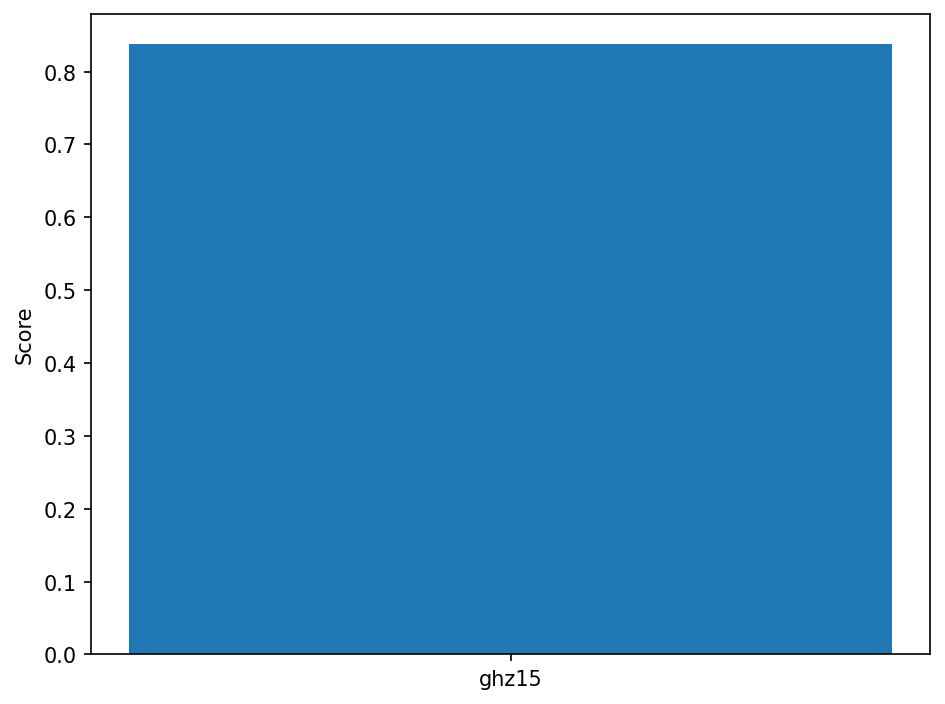

-----------------------------------------------------------
USED BACKEND:: fake_jakarta ; CIRCUIT_NAME: ghz18 ; SCORE = 0.8287030687235409


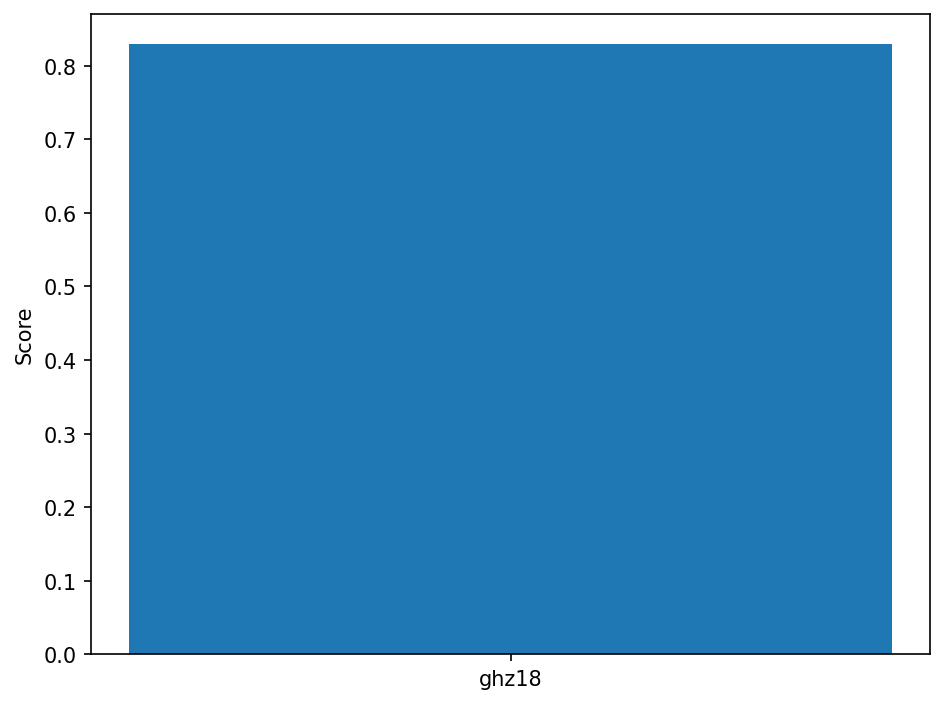

-----------------------------------------------------------


In [18]:
for label,benchmark,backend,job,score,sd,exec,tot in jobs:
    print("USED BACKEND::",backend().name,"; CIRCUIT_NAME:",label, "; SCORE =",score)
    supermarq.plotting.plot_results([score], [label])
    print("-----------------------------------------------------------")

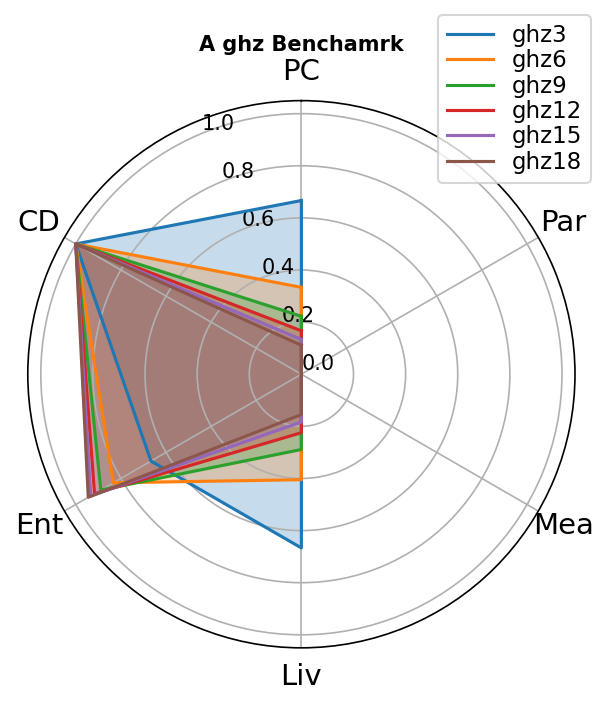

In [19]:
names=[]
scores=[]
X="A "+name_of_algo+' Benchamrk'
for i,j in benchmark_features.items():
    names.append(i)
    scores.append(j)
supermarq.plotting.plot_benchmark([X,names,scores],
        spoke_labels=["PC", "CD", "Ent", "Liv", "Mea", "Par"],show=True)

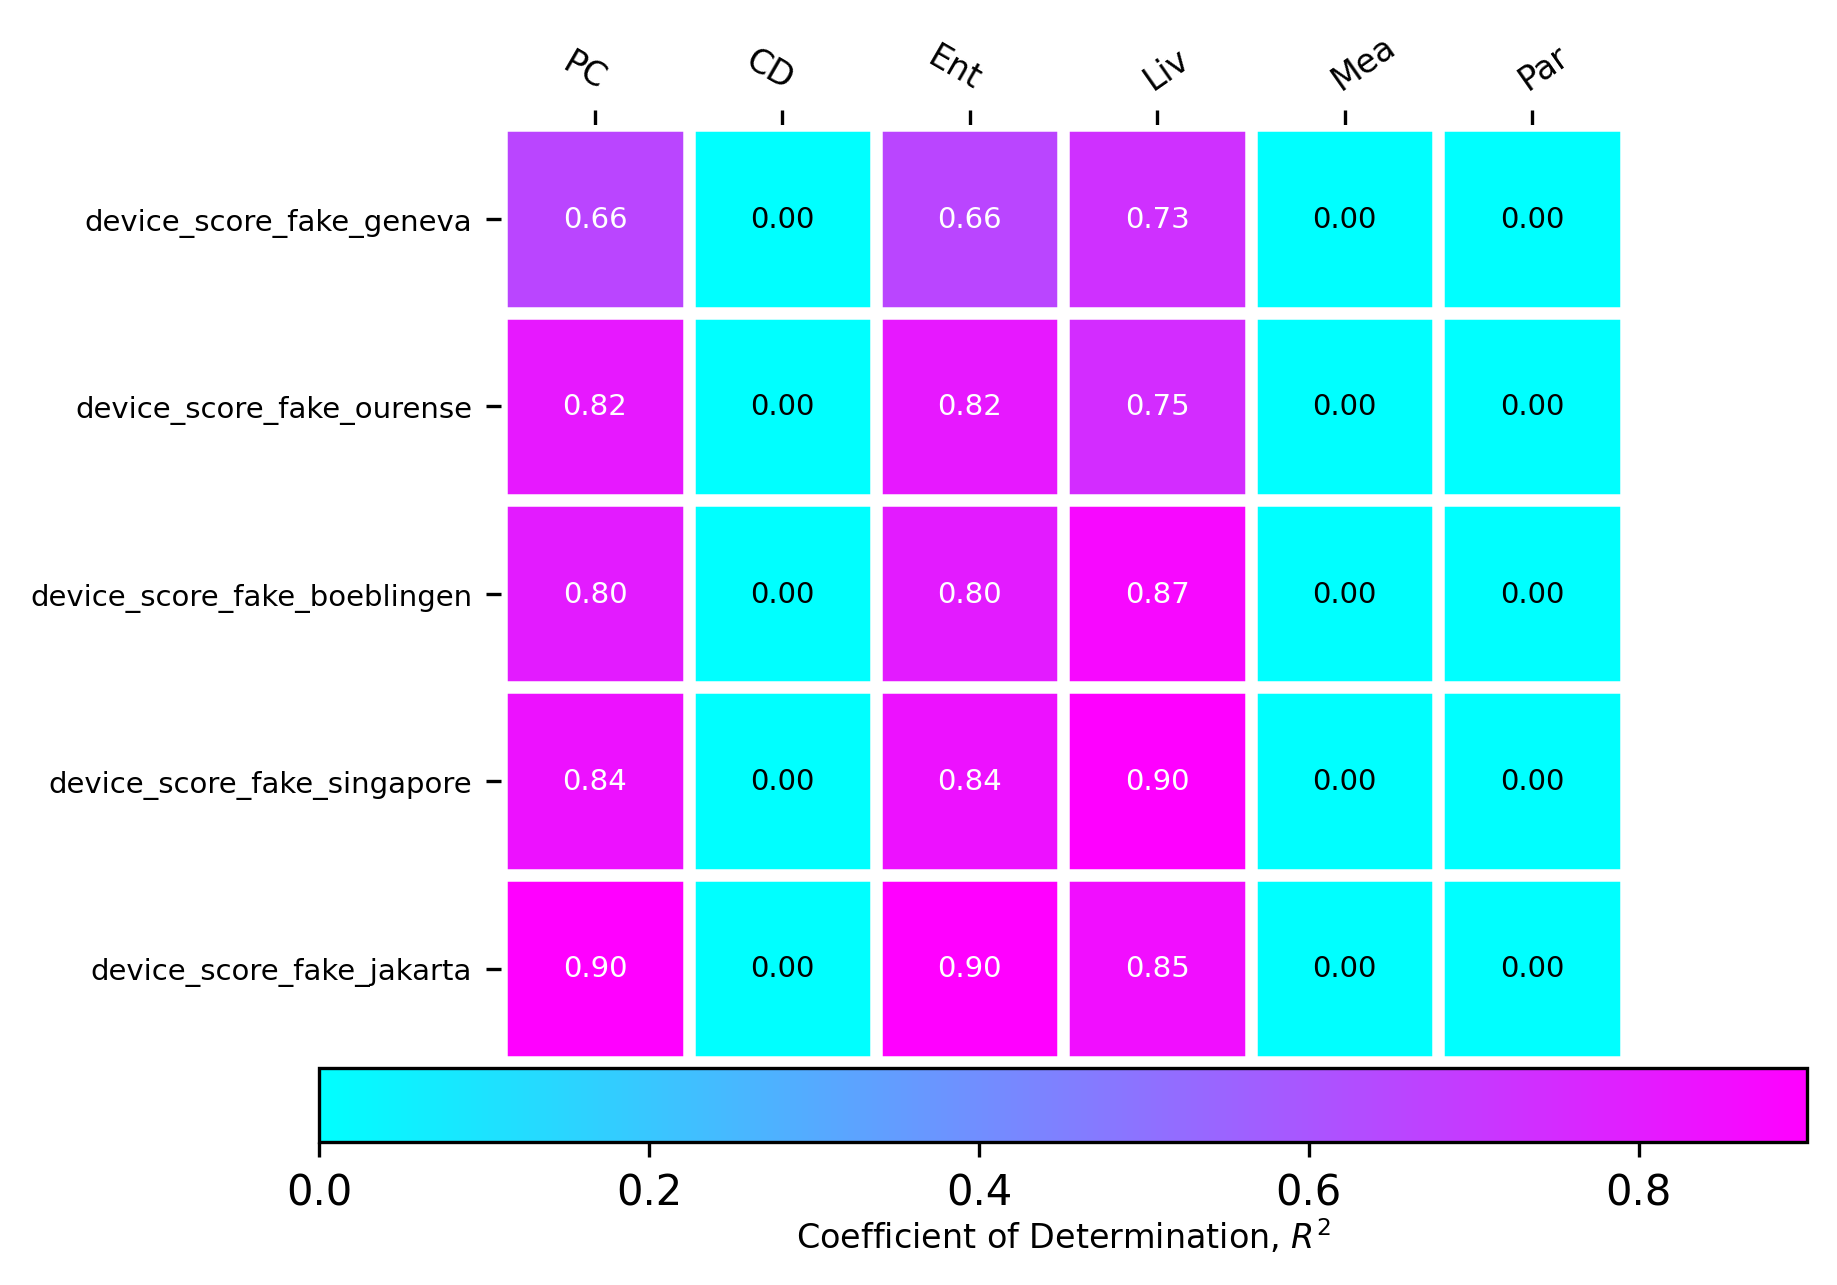

In [20]:
supermarq.plotting.plot_correlations(benchmark_features,all_fake_scores,["PC", "CD", "Ent", "Liv", "Mea", "Par"],device_name=all_fake_names,show=True,)

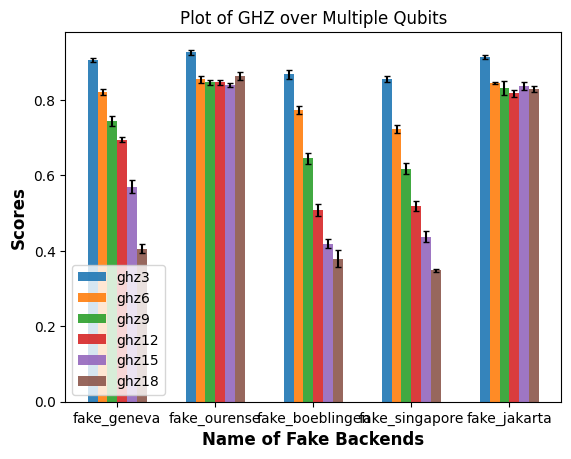

In [21]:
%matplotlib inline 
import matplotlib.pyplot as plt 
import numpy as np
all_fake_names=[]
all_score=[]
all_sd=[]
all_ckt=[]
for i in selected_fakes:
    all_fake_names.append(i().name)    
for benchmark, label in benchmarks:
    i=[]
    j=[]
    k=[]
    for ckt,benchmark,backend,job,score,sd,exec,tot in jobs:
        if ckt == label:
            i.append(score)
            j.append(sd)
    all_ckt.append(label)
    all_score.append(i)
    all_sd.append(j)
num_bars = len(all_score)
width = 0.1
x = np.arange(len(all_fake_names)) # x-axis positions for each bar
fig, ax = plt.subplots()
for i in range(num_bars):               # Create bars for each category with appropriate offsets
    ax.bar(x + i * width, all_score[i], width=width, label=f'Bar {i+1}', 
           yerr=all_sd[i],align='center',alpha=0.9,ecolor='black',capsize=2)
ax.set_xlabel('Name of Fake Backends',fontweight ='bold',fontsize = 12)
ax.set_ylabel('Scores',fontweight ='bold',fontsize = 12)
ax.set_title('Plot of GHZ over Multiple Qubits')
ax.set_xticks(x + (num_bars - 1) * width / 2)
ax.set_xticklabels(all_fake_names)
ax.legend(all_ckt,loc="lower left")
#ax.grid(True)
plt.show()